issues:
- setting up for loop so it finds the folder instead of registering them all as '/'s
- what kind of object am i giving the model? a list?
- do i have to finetune? binarize labels?

In [1]:
import os

# tf tools
import tensorflow as tf

# image processsing
from tensorflow.keras.preprocessing.image import (load_img,
                                                  img_to_array,
                                                  ImageDataGenerator)
# VGG16 model
from tensorflow.keras.applications.vgg16 import (preprocess_input,
                                                 decode_predictions,
                                                 VGG16)
# layers
from tensorflow.keras.layers import (Flatten, 
                                     Dense, 
                                     Dropout, 
                                     BatchNormalization)
# generic model object
from tensorflow.keras.models import Model

# optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD, Adam

#scikit-learn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# for plotting
import numpy as np
import matplotlib.pyplot as plt

2024-04-09 13:28:31.912842: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
filepath = "../input/Tobacco3482/"


In [22]:
#load data
for folder in filepath:
    test2 = filepath + "/" + folder
    img = []
    for file in folder:
        test3 = test2 + "/" + "0000136188.jpg"
        #image = load_img(subfolderpath)
    #folderpath = os.path.join (filepath + folder)
    #folderdata = [] # making a list for every folder's data
    #for file in folderpath:
        # imagepath = folderpath + "/" + file
        #image = load_img(imagepath, target_size=(224, 224)) #might not need to resize images

print(folder)

/


In [ ]:
test2 = filepath + "/" + folder + "/" + "0000136188.jpg"

In [16]:
print(testpath)

../input/Tobacco3482//ADVE/0000136188.jpg


In [ ]:
for folder in sorted_dir:
    folder_path = os.path.join(main_folder_path, folder)
    filenames = sorted(os.listdir(folder_path))
    # creating a list for every folder's info to be gathered in. will be used to create dataframes later
    folder_info = []
    
    for text_file in filenames:
        file_path = folder_path + "/" + text_file
        
        with open (file_path, encoding="latin-1") as file:
            text = file.read()

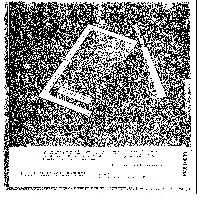

In [23]:
testpath = filepath + "/" + "ADVE" + "/" + "0000136188.jpg"
image = load_img(testpath, target_size=(224, 224))
image

In [24]:
# convert to array
image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# preprocess the image for the VGG model
image = preprocess_input(image)

In [33]:
image.shape

(1, 224, 224, 3)

In [25]:
# load the model
model = VGG16()
# try training a model yourself also and compare the results

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
#finetune on our dataset 
#dont know what this does!!!
((X_train, y_train), (X_test, y_test)) = DATAGOESHERE
X_train = X_train.astype("float") / 255.
X_test = X_test.astype("float") / 255.

In [26]:
# defining labels
labelnames = ['advertisement', 'email', 
            'form', 'letter', 
            'memo', 'news', 
            'note', 'report', 
            'resume', 'scientific paper']

In [29]:
# load model without classifier layers
model = VGG16(include_top=False, 
              pooling='avg',
              input_shape=(224, 224, 3)) #unsure about this part. took it from the shape of the test img after preprocessing

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [30]:
# mark loaded layers as not trainable
# dont know why
for layer in model.layers:
    layer.trainable = False

In [31]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output) #take the model's last layer's output and flatten that
class1 = Dense(128, activation='relu')(flat1) # second set of brackets show which layer the current layer is being appended to
output = Dense(10, activation='softmax')(class1)

# define new model
model = Model(inputs=model.inputs, 
              outputs=output)
# summarize
model.summary()

In [ ]:
#optimization algorithm
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
sgd = SGD(learning_rate=lr_schedule)

In [ ]:
# compile the model
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train the model
H = model.fit(X_train, y_train, 
            validation_split=0.1,
            batch_size=128,
            epochs=10,
            verbose=1)

In [ ]:
plot_history(H, 10)

In [ ]:
# create classification report and learning curves
predictions = model.predict(X_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelnames))

    # saving classification report as a .txt file
    text_file = open(r'../output/classification_report.txt', 'w')
    text_file.write(classifier_metrics)
    text_file.close()

    # plotting loss curves. should ideally have a smooth, steep downwards slope which ends in a plateau
    plt.plot(classifier.loss_curve_)
    plt.title("Loss curve during training", fontsize=14)
    plt.xlabel('Iterations')
    plt.ylabel('Loss score')
    # save output
    plt.savefig('../output/loss_curve.png')
    plt.show()